# Importing Necessary Libraries

In [1]:

import pandas as pd
import numpy as np
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
import gensim
from gensim import corpora, models
from pprint import pprint
import re
from sklearn.naive_bayes import GaussianNB


In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Azhar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Loading Datasets

In [3]:
train = pd.read_csv('C:\\Users\\Azhar\\Downloads\\file (4)\\data\\train.csv', encoding='utf-8')
test = pd.read_csv('C:\\Users\\Azhar\\Downloads\\file (4)\\data\\test.csv', encoding='utf-8')

In [4]:
train

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1
...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1
7271,5378,RT @mention Aha! Found proof of lactation room...,1
7272,2173,We just launched our iPad app at #SXSW! Get al...,1


In [5]:
train.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [6]:
train.dropna(inplace=True)

# Checking number of Positive and Negative tweets for the Popular products

In [7]:
train['product']=train.tweet.str.findall(r'ipad2|android|iphone')

In [8]:
train['product'].value_counts()

[]                           6850
[ipad2]                       156
[iphone]                      141
[android]                      97
[iphone, android]               7
[android, iphone]               7
[android, android]              6
[iphone, iphone]                5
[ipad2, ipad2]                  2
[iphone, android, iphone]       1
[ipad2, iphone]                 1
Name: product, dtype: int64

# Negative Tweets

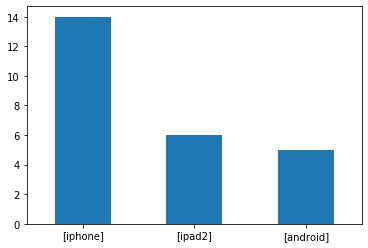

In [9]:
train['product'][train['sentiment']==0].value_counts()[1:4].plot.bar(rot=0)

# Positive Tweets

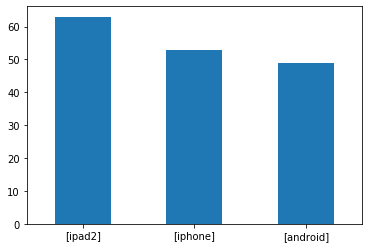

In [10]:
train['product'][train['sentiment']==2].value_counts()[1:4].plot.bar(rot=0)

# Cleaning the Data

In [11]:
def clean_data(tweet):
    tweet=str(tweet).lower()
    
    number_pat = r'\d+'
    tweet=re.sub(pattern=number_pat,repl="",string=tweet,flags=re.I)
    link_pat=r"http://[0-9a-z\-\.]+ | https://[a-z0-9_\.]+|www.[a-z0-9]+"
    tweet=re.sub(pattern=link_pat,repl="",string=tweet,flags=re.I)
    shortlink_pat=r"bit.ly[a-z0-9\.]+"
    tweet=re.sub(pattern=shortlink_pat,repl="",string=tweet,flags=re.I)
    num_pat=r="\d+"
    tweet=re.sub('÷¼', '', tweet)
    tweet=re.sub('÷', '', tweet)
    tweet=re.sub('¼ûäü','', tweet)
    punctuations = '''!()-![]{};:+"\,<>./?$%^&*_~ª'''
    tweet = ''.join([i for i in tweet if not i in punctuations])
    tweet=[x for x in tweet.split() if len(x) > 2]
    
    return tweet
train['clean_tweet']=train['tweet'].map(clean_data)
train
    

,tweet_id,tweet,sentiment,product,clean_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,[],"[#sxswnui, #sxsw, #apple, defining, language, ..."
1,1851,Learning ab Google doodles! All doodles should...,1,[],"[learning, google, doodles, all, doodles, shou..."
2,2689,one of the most in-your-face ex. of stealing t...,2,[],"[one, the, most, inyourface, stealing, the, sh..."
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,[],"[this, iphone, #sxsw, app, would, pretty, awes..."
4,3604,Line outside the Apple store in Austin waiting...,1,[],"[line, outside, the, apple, store, austin, wai..."
...,...,...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1,[],"[@mention, google, plze, tammi, i'm, middle, #..."
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1,[],"[@mention, are, you, all, set, link, #edchat, ..."
7271,5378,RT @mention Aha! Found proof of lactation room...,1,[],"[@mention, aha, found, proof, lactation, room,..."
7272,2173,We just launched our iPad app at #SXSW! Get al...,1,[],"[just, launched, our, ipad, app, #sxsw, get, a..."


In [12]:
train['clean_tweet_str'] = [' '.join(map(str, l)) for l in train['clean_tweet']]
train.head()

,tweet_id,tweet,sentiment,product,clean_tweet,clean_tweet_str
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,[],"[#sxswnui, #sxsw, #apple, defining, language, ...",#sxswnui #sxsw #apple defining language touch ...
1,1851,Learning ab Google doodles! All doodles should...,1,[],"[learning, google, doodles, all, doodles, shou...",learning google doodles all doodles should lig...
2,2689,one of the most in-your-face ex. of stealing t...,2,[],"[one, the, most, inyourface, stealing, the, sh...",one the most inyourface stealing the show yrs ...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,[],"[this, iphone, #sxsw, app, would, pretty, awes...",this iphone #sxsw app would pretty awesome did...
4,3604,Line outside the Apple store in Austin waiting...,1,[],"[line, outside, the, apple, store, austin, wai...",line outside the apple store austin waiting fo...


# Wordcloud for hashtags in tweet

In [13]:
all_sentence=' '.join(train['clean_tweet_str'])
hastag_pat = r'#[0-9a-z_]+'
hasttag=re.findall(hastag_pat, all_sentence, flags=re.I)
value = ','.join(map(str, hasttag))
remove_hasttag=re.sub('#','',value)

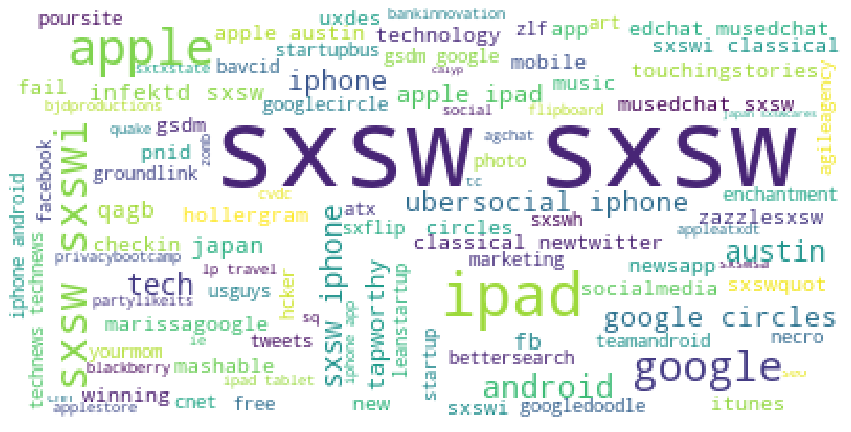

In [14]:
# Create a word cloud for hasgtags
stw = stopwords.words('english')
wc =WordCloud(stopwords=stw, background_color='white', max_words=100).generate(remove_hasttag)

%matplotlib inline
plt.figure(figsize=(15, 15))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

# Removal of hashtag sxsw and user handles from tweet

In [15]:
def clean_hashtag(tweet):
    tweet=str(tweet).lower()
    hastag_pat = r'#sxswnui|#sxswi|#sxsw|#'
    tweet=re.sub(pattern=hastag_pat,repl="",string=tweet,flags=re.I)
    mentions_pat = r'@[0-9a-z_\-]+'
    tweet=re.sub(pattern=mentions_pat,repl="",string=tweet,flags=re.I)
    return tweet

In [16]:
train['remove_hashtags']=train['clean_tweet_str'].map(clean_hashtag)
train.head(11)

,tweet_id,tweet,sentiment,product,clean_tweet,clean_tweet_str,remove_hashtags
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,[],"[#sxswnui, #sxsw, #apple, defining, language, ...",#sxswnui #sxsw #apple defining language touch ...,apple defining language touch with different...
1,1851,Learning ab Google doodles! All doodles should...,1,[],"[learning, google, doodles, all, doodles, shou...",learning google doodles all doodles should lig...,learning google doodles all doodles should lig...
2,2689,one of the most in-your-face ex. of stealing t...,2,[],"[one, the, most, inyourface, stealing, the, sh...",one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,[],"[this, iphone, #sxsw, app, would, pretty, awes...",this iphone #sxsw app would pretty awesome did...,this iphone app would pretty awesome didn't c...
4,3604,Line outside the Apple store in Austin waiting...,1,[],"[line, outside, the, apple, store, austin, wai...",line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,[],"[#technews, one, lone, dude, awaits, ipad, app...",#technews one lone dude awaits ipad appleûs s...,technews one lone dude awaits ipad appleûs sx...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,[],"[sxsw, tips, prince, npr, videos, toy, shoppin...",sxsw tips prince npr videos toy shopping with ...,sxsw tips prince npr videos toy shopping with ...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,[],"[user, @mention, new, #ubersocial, for, #iphon...",user @mention new #ubersocial for #iphone now ...,user new ubersocial for iphone now the app st...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,[],"[free, #sxsw, sampler, itunes, link, #freemusic]",free #sxsw sampler itunes link #freemusic,free sampler itunes link freemusic
9,883,I think I might go all weekend without seeing ...,2,[],"[think, might, all, weekend, without, seeing, ...",think might all weekend without seeing the sam...,think might all weekend without seeing the sam...


In [17]:
def only_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text,flags=re.I)
    return text
train['remove_unwanted']=train['remove_hashtags'].map(lambda x: only_text(x))

In [18]:
train['remove_unwanted']

0         apple defining language touch with different...
1       learning google doodles all doodles should lig...
2       one the most inyourface stealing the show yrs ...
3       this iphone  app would pretty awesome didn t c...
4       line outside the apple store austin waiting fo...
                              ...                        
7269     google plze tammi i m middle  craziness and e...
7270     are you all set link edchat musedchat   newtw...
7271     aha found proof lactation room excuse quotmot...
7272    just launched our ipad app  get all the detail...
7273    the next fin serv battle apple goog mobile ope...
Name: remove_unwanted, Length: 7273, dtype: object

#  Expanding Contractions

In [19]:
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [20]:
def lookup_dict(text, dictionary):
    for word in text:
        if word.lower() in dictionary:
            if word.lower() in text:
                text = text.replace(word, dictionary[word.lower()])
    return text

In [21]:
train['no_contract'] = train['remove_unwanted'].apply(lambda x: lookup_dict(x,apostrophe_dict))
train.head(10)

,tweet_id,tweet,sentiment,product,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,no_contract
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,[],"[#sxswnui, #sxsw, #apple, defining, language, ...",#sxswnui #sxsw #apple defining language touch ...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...
1,1851,Learning ab Google doodles! All doodles should...,1,[],"[learning, google, doodles, all, doodles, shou...",learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...
2,2689,one of the most in-your-face ex. of stealing t...,2,[],"[one, the, most, inyourface, stealing, the, sh...",one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,[],"[this, iphone, #sxsw, app, would, pretty, awes...",this iphone #sxsw app would pretty awesome did...,this iphone app would pretty awesome didn't c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...
4,3604,Line outside the Apple store in Austin waiting...,1,[],"[line, outside, the, apple, store, austin, wai...",line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,[],"[#technews, one, lone, dude, awaits, ipad, app...",#technews one lone dude awaits ipad appleûs s...,technews one lone dude awaits ipad appleûs sx...,technews one lone dude awaits ipad apple s sx...,technews one lone dude awaits ipad apple s sx...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,[],"[sxsw, tips, prince, npr, videos, toy, shoppin...",sxsw tips prince npr videos toy shopping with ...,sxsw tips prince npr videos toy shopping with ...,sxsw tips prince npr videos toy shopping with ...,sxsw tips prince npr videos toy shopping with ...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,[],"[user, @mention, new, #ubersocial, for, #iphon...",user @mention new #ubersocial for #iphone now ...,user new ubersocial for iphone now the app st...,user new ubersocial for iphone now the app st...,user new ubersocial for iphone now the app st...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,[],"[free, #sxsw, sampler, itunes, link, #freemusic]",free #sxsw sampler itunes link #freemusic,free sampler itunes link freemusic,free sampler itunes link freemusic,free sampler itunes link freemusic
9,883,I think I might go all weekend without seeing ...,2,[],"[think, might, all, weekend, without, seeing, ...",think might all weekend without seeing the sam...,think might all weekend without seeing the sam...,think might all weekend without seeing the sam...,think might all weekend without seeing the sam...


In [22]:
train['no_conct_str'] = [''.join(map(str, l)) for l in train['no_contract']]
train.head(11)

,tweet_id,tweet,sentiment,product,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,no_contract,no_conct_str
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,[],"[#sxswnui, #sxsw, #apple, defining, language, ...",#sxswnui #sxsw #apple defining language touch ...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...
1,1851,Learning ab Google doodles! All doodles should...,1,[],"[learning, google, doodles, all, doodles, shou...",learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...
2,2689,one of the most in-your-face ex. of stealing t...,2,[],"[one, the, most, inyourface, stealing, the, sh...",one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,[],"[this, iphone, #sxsw, app, would, pretty, awes...",this iphone #sxsw app would pretty awesome did...,this iphone app would pretty awesome didn't c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...
4,3604,Line outside the Apple store in Austin waiting...,1,[],"[line, outside, the, apple, store, austin, wai...",line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,[],"[#technews, one, lone, dude, awaits, ipad, app...",#technews one lone dude awaits ipad appleûs s...,technews one lone dude awaits ipad appleûs sx...,technews one lone dude awaits ipad apple s sx...,technews one lone dude awaits ipad apple s sx...,technews one lone dude awaits ipad apple s sx...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,[],"[sxsw, tips, prince, npr, videos, toy, shoppin...",sxsw tips prince npr videos toy shopping with ...,sxsw tips prince npr videos toy shopping with ...,sxsw tips prince npr videos toy shopping with ...,sxsw tips prince npr videos toy shopping with ...,sxsw tips prince npr videos toy shopping with ...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,[],"[user, @mention, new, #ubersocial, for, #iphon...",user @mention new #ubersocial for #iphone now ...,user new ubersocial for iphone now the app st...,user new ubersocial for iphone now the app st...,user new ubersocial for iphone now the app st...,user new ubersocial for iphone now the app st...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,[],"[free, #sxsw, sampler, itunes, link, #freemusic]",free #sxsw sampler itunes link #freemusic,free sampler itunes link freemusic,free sampler itunes link freemusic,free sampler itunes link freemusic,free sampler itunes link freemusic
9,883,I think I might go all weekend without seeing ...,2,[],"[think, might, all, weekend, without, seeing, ...",think might all weekend without seeing the sam...,think might all weekend without seeing the sam...,think might all weekend without seeing the sam...,think might all weekend without seeing the sam...,think might all weekend without seeing the sam...


# Tokenization

In [23]:
train['tokenized'] = train['no_conct_str'].apply(word_tokenize)
train.head()

,tweet_id,tweet,sentiment,product,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,no_contract,no_conct_str,tokenized
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,[],"[#sxswnui, #sxsw, #apple, defining, language, ...",#sxswnui #sxsw #apple defining language touch ...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,"[apple, defining, language, touch, with, diffe..."
1,1851,Learning ab Google doodles! All doodles should...,1,[],"[learning, google, doodles, all, doodles, shou...",learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,"[learning, google, doodles, all, doodles, shou..."
2,2689,one of the most in-your-face ex. of stealing t...,2,[],"[one, the, most, inyourface, stealing, the, sh...",one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,"[one, the, most, inyourface, stealing, the, sh..."
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,[],"[this, iphone, #sxsw, app, would, pretty, awes...",this iphone #sxsw app would pretty awesome did...,this iphone app would pretty awesome didn't c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,"[this, iphone, app, would, pretty, awesome, di..."
4,3604,Line outside the Apple store in Austin waiting...,1,[],"[line, outside, the, apple, store, austin, wai...",line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,"[line, outside, the, apple, store, austin, wai..."


# Stopword Removal and creating a wordclod for all the tweets out of it

In [24]:
stop_words = set(stopwords.words('english'))
train['stopwords_removed'] = train['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
train.head()

,tweet_id,tweet,sentiment,product,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,no_contract,no_conct_str,tokenized,stopwords_removed
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,[],"[#sxswnui, #sxsw, #apple, defining, language, ...",#sxswnui #sxsw #apple defining language touch ...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,"[apple, defining, language, touch, with, diffe...","[apple, defining, language, touch, different, ..."
1,1851,Learning ab Google doodles! All doodles should...,1,[],"[learning, google, doodles, all, doodles, shou...",learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,"[learning, google, doodles, all, doodles, shou...","[learning, google, doodles, doodles, light, fu..."
2,2689,one of the most in-your-face ex. of stealing t...,2,[],"[one, the, most, inyourface, stealing, the, sh...",one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,"[one, the, most, inyourface, stealing, the, sh...","[one, inyourface, stealing, show, yrs, quotat,..."
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,[],"[this, iphone, #sxsw, app, would, pretty, awes...",this iphone #sxsw app would pretty awesome did...,this iphone app would pretty awesome didn't c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,"[this, iphone, app, would, pretty, awesome, di...","[iphone, app, would, pretty, awesome, crash, e..."
4,3604,Line outside the Apple store in Austin waiting...,1,[],"[line, outside, the, apple, store, austin, wai...",line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,"[line, outside, the, apple, store, austin, wai...","[line, outside, apple, store, austin, waiting,..."


In [25]:
all_set=np.array(train.stopwords_removed)

In [26]:
values = ','.join(map(str, all_set))

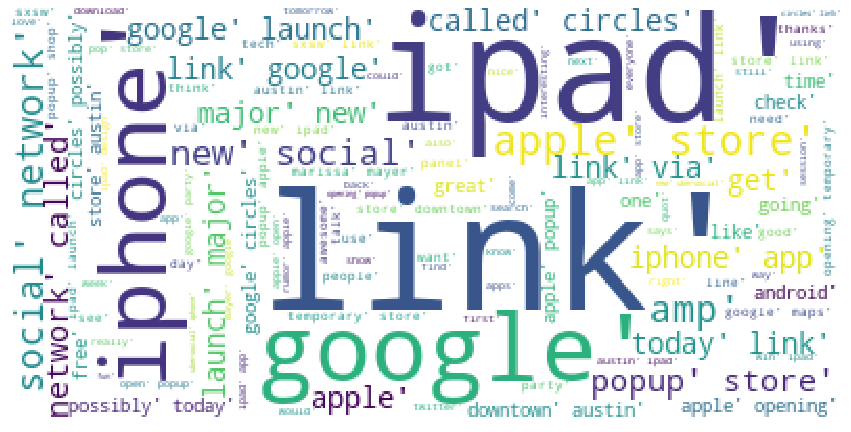

In [27]:
# Create a word cloud

wc =WordCloud(stopwords=stw, background_color='white', max_words=1500).generate(values)

%matplotlib inline
plt.figure(figsize=(15, 10))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

# Word clouds for different sentiments on the tweets

In [28]:
rr_0=train[train['sentiment']==0]
rr_1=train[train['sentiment']==1]
rr_2=train[train['sentiment']==2]
rr_3=train[train['sentiment']==3]

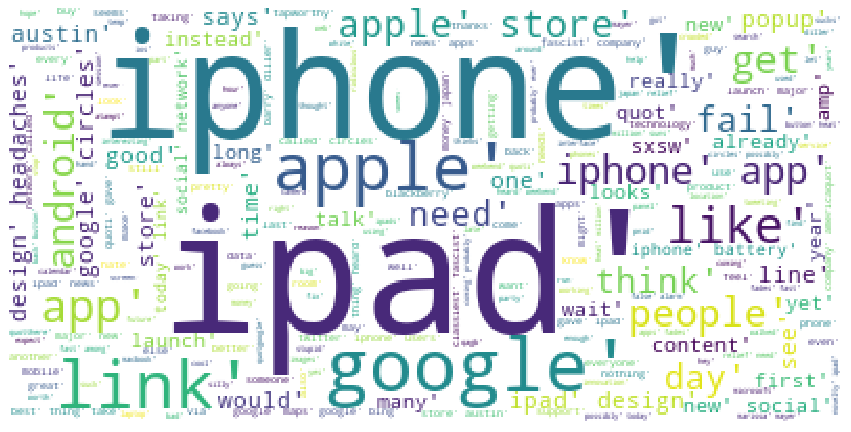

In [29]:
all_set=np.array(rr_0.stopwords_removed)
values = ','.join(map(str, all_set))
# Create a word cloud

wc =WordCloud(stopwords=stw, background_color='white', max_words=1500).generate(values)

%matplotlib inline
plt.figure(figsize=(15, 10))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

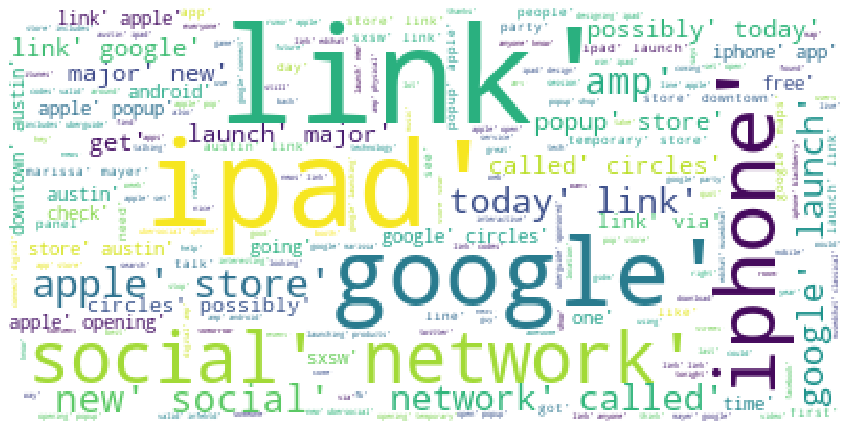

In [30]:
all_set=np.array(rr_1.stopwords_removed)
values = ','.join(map(str, all_set))
# Create a word cloud

wc =WordCloud(stopwords=stw, background_color='white', max_words=1500).generate(values)

%matplotlib inline
plt.figure(figsize=(15, 10))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

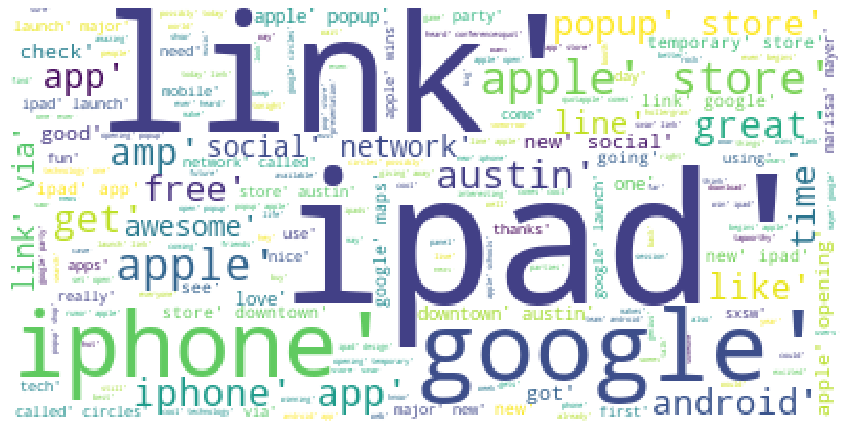

In [31]:
all_set=np.array(rr_2.stopwords_removed)
values = ','.join(map(str, all_set))
# Create a word cloud

wc =WordCloud(stopwords=stw, background_color='white', max_words=1500).generate(values)

%matplotlib inline
plt.figure(figsize=(15, 10))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

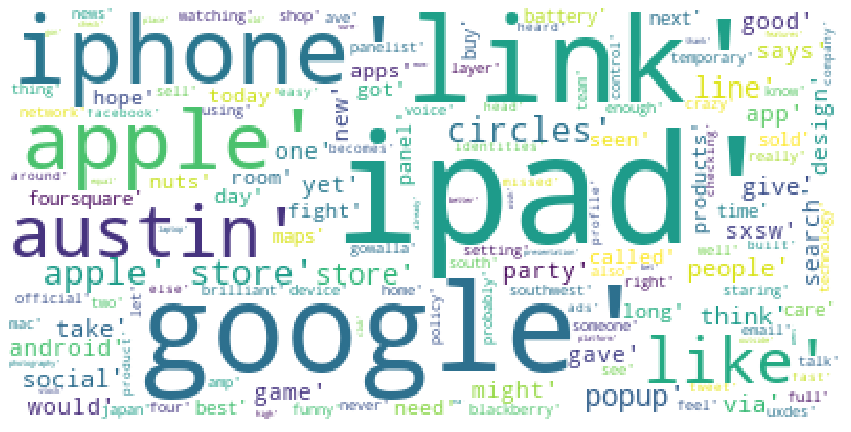

In [32]:
all_set=np.array(rr_3.stopwords_removed)
values = ','.join(map(str, all_set))
# Create a word cloud

wc =WordCloud(stopwords=stw, background_color='white', max_words=1500).generate(values)

%matplotlib inline
plt.figure(figsize=(15, 10))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

# Applying part of speech to tokenized sentences

In [33]:
train['pos_tags'] = train['stopwords_removed'].apply(nltk.tag.pos_tag)
train.head()

,tweet_id,tweet,sentiment,product,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,no_contract,no_conct_str,tokenized,stopwords_removed,pos_tags
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,[],"[#sxswnui, #sxsw, #apple, defining, language, ...",#sxswnui #sxsw #apple defining language touch ...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,"[apple, defining, language, touch, with, diffe...","[apple, defining, language, touch, different, ...","[(apple, NN), (defining, VBG), (language, NN),..."
1,1851,Learning ab Google doodles! All doodles should...,1,[],"[learning, google, doodles, all, doodles, shou...",learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,"[learning, google, doodles, all, doodles, shou...","[learning, google, doodles, doodles, light, fu...","[(learning, VBG), (google, NN), (doodles, NNS)..."
2,2689,one of the most in-your-face ex. of stealing t...,2,[],"[one, the, most, inyourface, stealing, the, sh...",one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,"[one, the, most, inyourface, stealing, the, sh...","[one, inyourface, stealing, show, yrs, quotat,...","[(one, CD), (inyourface, NN), (stealing, VBG),..."
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,[],"[this, iphone, #sxsw, app, would, pretty, awes...",this iphone #sxsw app would pretty awesome did...,this iphone app would pretty awesome didn't c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,"[this, iphone, app, would, pretty, awesome, di...","[iphone, app, would, pretty, awesome, crash, e...","[(iphone, NN), (app, NN), (would, MD), (pretty..."
4,3604,Line outside the Apple store in Austin waiting...,1,[],"[line, outside, the, apple, store, austin, wai...",line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,"[line, outside, the, apple, store, austin, wai...","[line, outside, apple, store, austin, waiting,...","[(line, NN), (outside, IN), (apple, NN), (stor..."


In [34]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [35]:
train['wordnet_pos'] = train['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
train.head()

,tweet_id,tweet,sentiment,product,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,no_contract,no_conct_str,tokenized,stopwords_removed,pos_tags,wordnet_pos
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,[],"[#sxswnui, #sxsw, #apple, defining, language, ...",#sxswnui #sxsw #apple defining language touch ...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,"[apple, defining, language, touch, with, diffe...","[apple, defining, language, touch, different, ...","[(apple, NN), (defining, VBG), (language, NN),...","[(apple, n), (defining, v), (language, n), (to..."
1,1851,Learning ab Google doodles! All doodles should...,1,[],"[learning, google, doodles, all, doodles, shou...",learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,"[learning, google, doodles, all, doodles, shou...","[learning, google, doodles, doodles, light, fu...","[(learning, VBG), (google, NN), (doodles, NNS)...","[(learning, v), (google, n), (doodles, n), (do..."
2,2689,one of the most in-your-face ex. of stealing t...,2,[],"[one, the, most, inyourface, stealing, the, sh...",one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,"[one, the, most, inyourface, stealing, the, sh...","[one, inyourface, stealing, show, yrs, quotat,...","[(one, CD), (inyourface, NN), (stealing, VBG),...","[(one, n), (inyourface, n), (stealing, v), (sh..."
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,[],"[this, iphone, #sxsw, app, would, pretty, awes...",this iphone #sxsw app would pretty awesome did...,this iphone app would pretty awesome didn't c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,"[this, iphone, app, would, pretty, awesome, di...","[iphone, app, would, pretty, awesome, crash, e...","[(iphone, NN), (app, NN), (would, MD), (pretty...","[(iphone, n), (app, n), (would, n), (pretty, v..."
4,3604,Line outside the Apple store in Austin waiting...,1,[],"[line, outside, the, apple, store, austin, wai...",line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,"[line, outside, the, apple, store, austin, wai...","[line, outside, apple, store, austin, waiting,...","[(line, NN), (outside, IN), (apple, NN), (stor...","[(line, n), (outside, n), (apple, n), (store, ..."


# Lemmatization

In [36]:
wnl = WordNetLemmatizer()
train['lemmatized'] = train['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
train.head()

,tweet_id,tweet,sentiment,product,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,no_contract,no_conct_str,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,[],"[#sxswnui, #sxsw, #apple, defining, language, ...",#sxswnui #sxsw #apple defining language touch ...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,"[apple, defining, language, touch, with, diffe...","[apple, defining, language, touch, different, ...","[(apple, NN), (defining, VBG), (language, NN),...","[(apple, n), (defining, v), (language, n), (to...","[apple, define, language, touch, different, di..."
1,1851,Learning ab Google doodles! All doodles should...,1,[],"[learning, google, doodles, all, doodles, shou...",learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,"[learning, google, doodles, all, doodles, shou...","[learning, google, doodles, doodles, light, fu...","[(learning, VBG), (google, NN), (doodles, NNS)...","[(learning, v), (google, n), (doodles, n), (do...","[learn, google, doodle, doodle, light, funny, ..."
2,2689,one of the most in-your-face ex. of stealing t...,2,[],"[one, the, most, inyourface, stealing, the, sh...",one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,"[one, the, most, inyourface, stealing, the, sh...","[one, inyourface, stealing, show, yrs, quotat,...","[(one, CD), (inyourface, NN), (stealing, VBG),...","[(one, n), (inyourface, n), (stealing, v), (sh...","[one, inyourface, steal, show, yrs, quotat, ap..."
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,[],"[this, iphone, #sxsw, app, would, pretty, awes...",this iphone #sxsw app would pretty awesome did...,this iphone app would pretty awesome didn't c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,"[this, iphone, app, would, pretty, awesome, di...","[iphone, app, would, pretty, awesome, crash, e...","[(iphone, NN), (app, NN), (would, MD), (pretty...","[(iphone, n), (app, n), (would, n), (pretty, v...","[iphone, app, would, pretty, awesome, crash, e..."
4,3604,Line outside the Apple store in Austin waiting...,1,[],"[line, outside, the, apple, store, austin, wai...",line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,"[line, outside, the, apple, store, austin, wai...","[line, outside, apple, store, austin, waiting,...","[(line, NN), (outside, IN), (apple, NN), (stor...","[(line, n), (outside, n), (apple, n), (store, ...","[line, outside, apple, store, austin, wait, ne..."


In [37]:
train['lemma_str'] = [' '.join(map(str,l)) for l in train['lemmatized']]
train.head()

,tweet_id,tweet,sentiment,product,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,no_contract,no_conct_str,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,[],"[#sxswnui, #sxsw, #apple, defining, language, ...",#sxswnui #sxsw #apple defining language touch ...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,"[apple, defining, language, touch, with, diffe...","[apple, defining, language, touch, different, ...","[(apple, NN), (defining, VBG), (language, NN),...","[(apple, n), (defining, v), (language, n), (to...","[apple, define, language, touch, different, di...",apple define language touch different dialect ...
1,1851,Learning ab Google doodles! All doodles should...,1,[],"[learning, google, doodles, all, doodles, shou...",learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,"[learning, google, doodles, all, doodles, shou...","[learning, google, doodles, doodles, light, fu...","[(learning, VBG), (google, NN), (doodles, NNS)...","[(learning, v), (google, n), (doodles, n), (do...","[learn, google, doodle, doodle, light, funny, ...",learn google doodle doodle light funny amp inn...
2,2689,one of the most in-your-face ex. of stealing t...,2,[],"[one, the, most, inyourface, stealing, the, sh...",one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,"[one, the, most, inyourface, stealing, the, sh...","[one, inyourface, stealing, show, yrs, quotat,...","[(one, CD), (inyourface, NN), (stealing, VBG),...","[(one, n), (inyourface, n), (stealing, v), (sh...","[one, inyourface, steal, show, yrs, quotat, ap...",one inyourface steal show yrs quotat apple sch...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,[],"[this, iphone, #sxsw, app, would, pretty, awes...",this iphone #sxsw app would pretty awesome did...,this iphone app would pretty awesome didn't c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,"[this, iphone, app, would, pretty, awesome, di...","[iphone, app, would, pretty, awesome, crash, e...","[(iphone, NN), (app, NN), (would, MD), (pretty...","[(iphone, n), (app, n), (would, n), (pretty, v...","[iphone, app, would, pretty, awesome, crash, e...",iphone app would pretty awesome crash every mi...
4,3604,Line outside the Apple store in Austin waiting...,1,[],"[line, outside, the, apple, store, austin, wai...",line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,"[line, outside, the, apple, store, austin, wai...","[line, outside, apple, store, austin, waiting,...","[(line, NN), (outside, IN), (apple, NN), (stor...","[(line, n), (outside, n), (apple, n), (store, ...","[line, outside, apple, store, austin, wait, ne...",line outside apple store austin wait new ipad ...


## Now use lemtization on toknized column i.e including stop word

In [38]:
train['pos_tok'] = train['tokenized'].apply(nltk.tag.pos_tag)
train.head()

train['wordnet_tok'] = train['pos_tok'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
train.head()

wnl = WordNetLemmatizer()
train['lemmatized_tok'] = train['wordnet_tok'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
train.head()

train['lemma_str_tok'] = [' '.join(map(str,l)) for l in train['lemmatized_tok']]
train.head(1)

,tweet_id,tweet,sentiment,product,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,no_contract,no_conct_str,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,pos_tok,wordnet_tok,lemmatized_tok,lemma_str_tok
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,[],"[#sxswnui, #sxsw, #apple, defining, language, ...",#sxswnui #sxsw #apple defining language touch ...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,"[apple, defining, language, touch, with, diffe...","[apple, defining, language, touch, different, ...","[(apple, NN), (defining, VBG), (language, NN),...","[(apple, n), (defining, v), (language, n), (to...","[apple, define, language, touch, different, di...",apple define language touch different dialect ...,"[(apple, NN), (defining, VBG), (language, NN),...","[(apple, n), (defining, v), (language, n), (to...","[apple, define, language, touch, with, differe...",apple define language touch with different dia...


In [39]:
train.lemma_str[2]#rmoving stop word

'one inyourface steal show yrs quotat apple school mkt expertsquot link'

In [40]:
train.lemma_str_tok[2]#including stop word

'one the most inyourface steal the show yrs quotat apple school the mkt expertsquot link'

In [41]:
!pip install textblob

In [42]:
from textblob import TextBlob

In [43]:
train['polarity'] = train['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
train.head()

,tweet_id,tweet,sentiment,product,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,no_contract,no_conct_str,...,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,pos_tok,wordnet_tok,lemmatized_tok,lemma_str_tok,polarity
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,[],"[#sxswnui, #sxsw, #apple, defining, language, ...",#sxswnui #sxsw #apple defining language touch ...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,apple defining language touch with different...,...,"[apple, defining, language, touch, different, ...","[(apple, NN), (defining, VBG), (language, NN),...","[(apple, n), (defining, v), (language, n), (to...","[apple, define, language, touch, different, di...",apple define language touch different dialect ...,"[(apple, NN), (defining, VBG), (language, NN),...","[(apple, n), (defining, v), (language, n), (to...","[apple, define, language, touch, with, differe...",apple define language touch with different dia...,-0.125000
1,1851,Learning ab Google doodles! All doodles should...,1,[],"[learning, google, doodles, all, doodles, shou...",learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,learning google doodles all doodles should lig...,...,"[learning, google, doodles, doodles, light, fu...","[(learning, VBG), (google, NN), (doodles, NNS)...","[(learning, v), (google, n), (doodles, n), (do...","[learn, google, doodle, doodle, light, funny, ...",learn google doodle doodle light funny amp inn...,"[(learning, VBG), (google, NN), (doodles, NNS)...","[(learning, v), (google, n), (doodles, n), (al...","[learn, google, doodle, all, doodle, should, l...",learn google doodle all doodle should light fu...,0.381250
2,2689,one of the most in-your-face ex. of stealing t...,2,[],"[one, the, most, inyourface, stealing, the, sh...",one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,one the most inyourface stealing the show yrs ...,...,"[one, inyourface, stealing, show, yrs, quotat,...","[(one, CD), (inyourface, NN), (stealing, VBG),...","[(one, n), (inyourface, n), (stealing, v), (sh...","[one, inyourface, steal, show, yrs, quotat, ap...",one inyourface steal show yrs quotat apple sch...,"[(one, CD), (the, DT), (most, RBS), (inyourfac...","[(one, n), (the, n), (most, r), (inyourface, a...","[one, the, most, inyourface, steal, the, show,...",one the most inyourface steal the show yrs quo...,0.000000
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,[],"[this, iphone, #sxsw, app, would, pretty, awes...",this iphone #sxsw app would pretty awesome did...,this iphone app would pretty awesome didn't c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,this iphone app would pretty awesome didn t c...,...,"[iphone, app, would, pretty, awesome, crash, e...","[(iphone, NN), (app, NN), (would, MD), (pretty...","[(iphone, n), (app, n), (would, n), (pretty, v...","[iphone, app, would, pretty, awesome, crash, e...",iphone app would pretty awesome crash every mi...,"[(this, DT), (iphone, NN), (app, NN), (would, ...","[(this, n), (iphone, n), (app, n), (would, n),...","[this, iphone, app, would, pretty, awesome, di...",this iphone app would pretty awesome didn t cr...,0.625000
4,3604,Line outside the Apple store in Austin waiting...,1,[],"[line, outside, the, apple, store, austin, wai...",line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,line outside the apple store austin waiting fo...,...,"[line, outside, apple, store, austin,

In [44]:
data = train.loc[:, ['lemma_str','lemmatized','sentiment','polarity','lemma_str_tok']]

# Polarity graph of Sentiment 

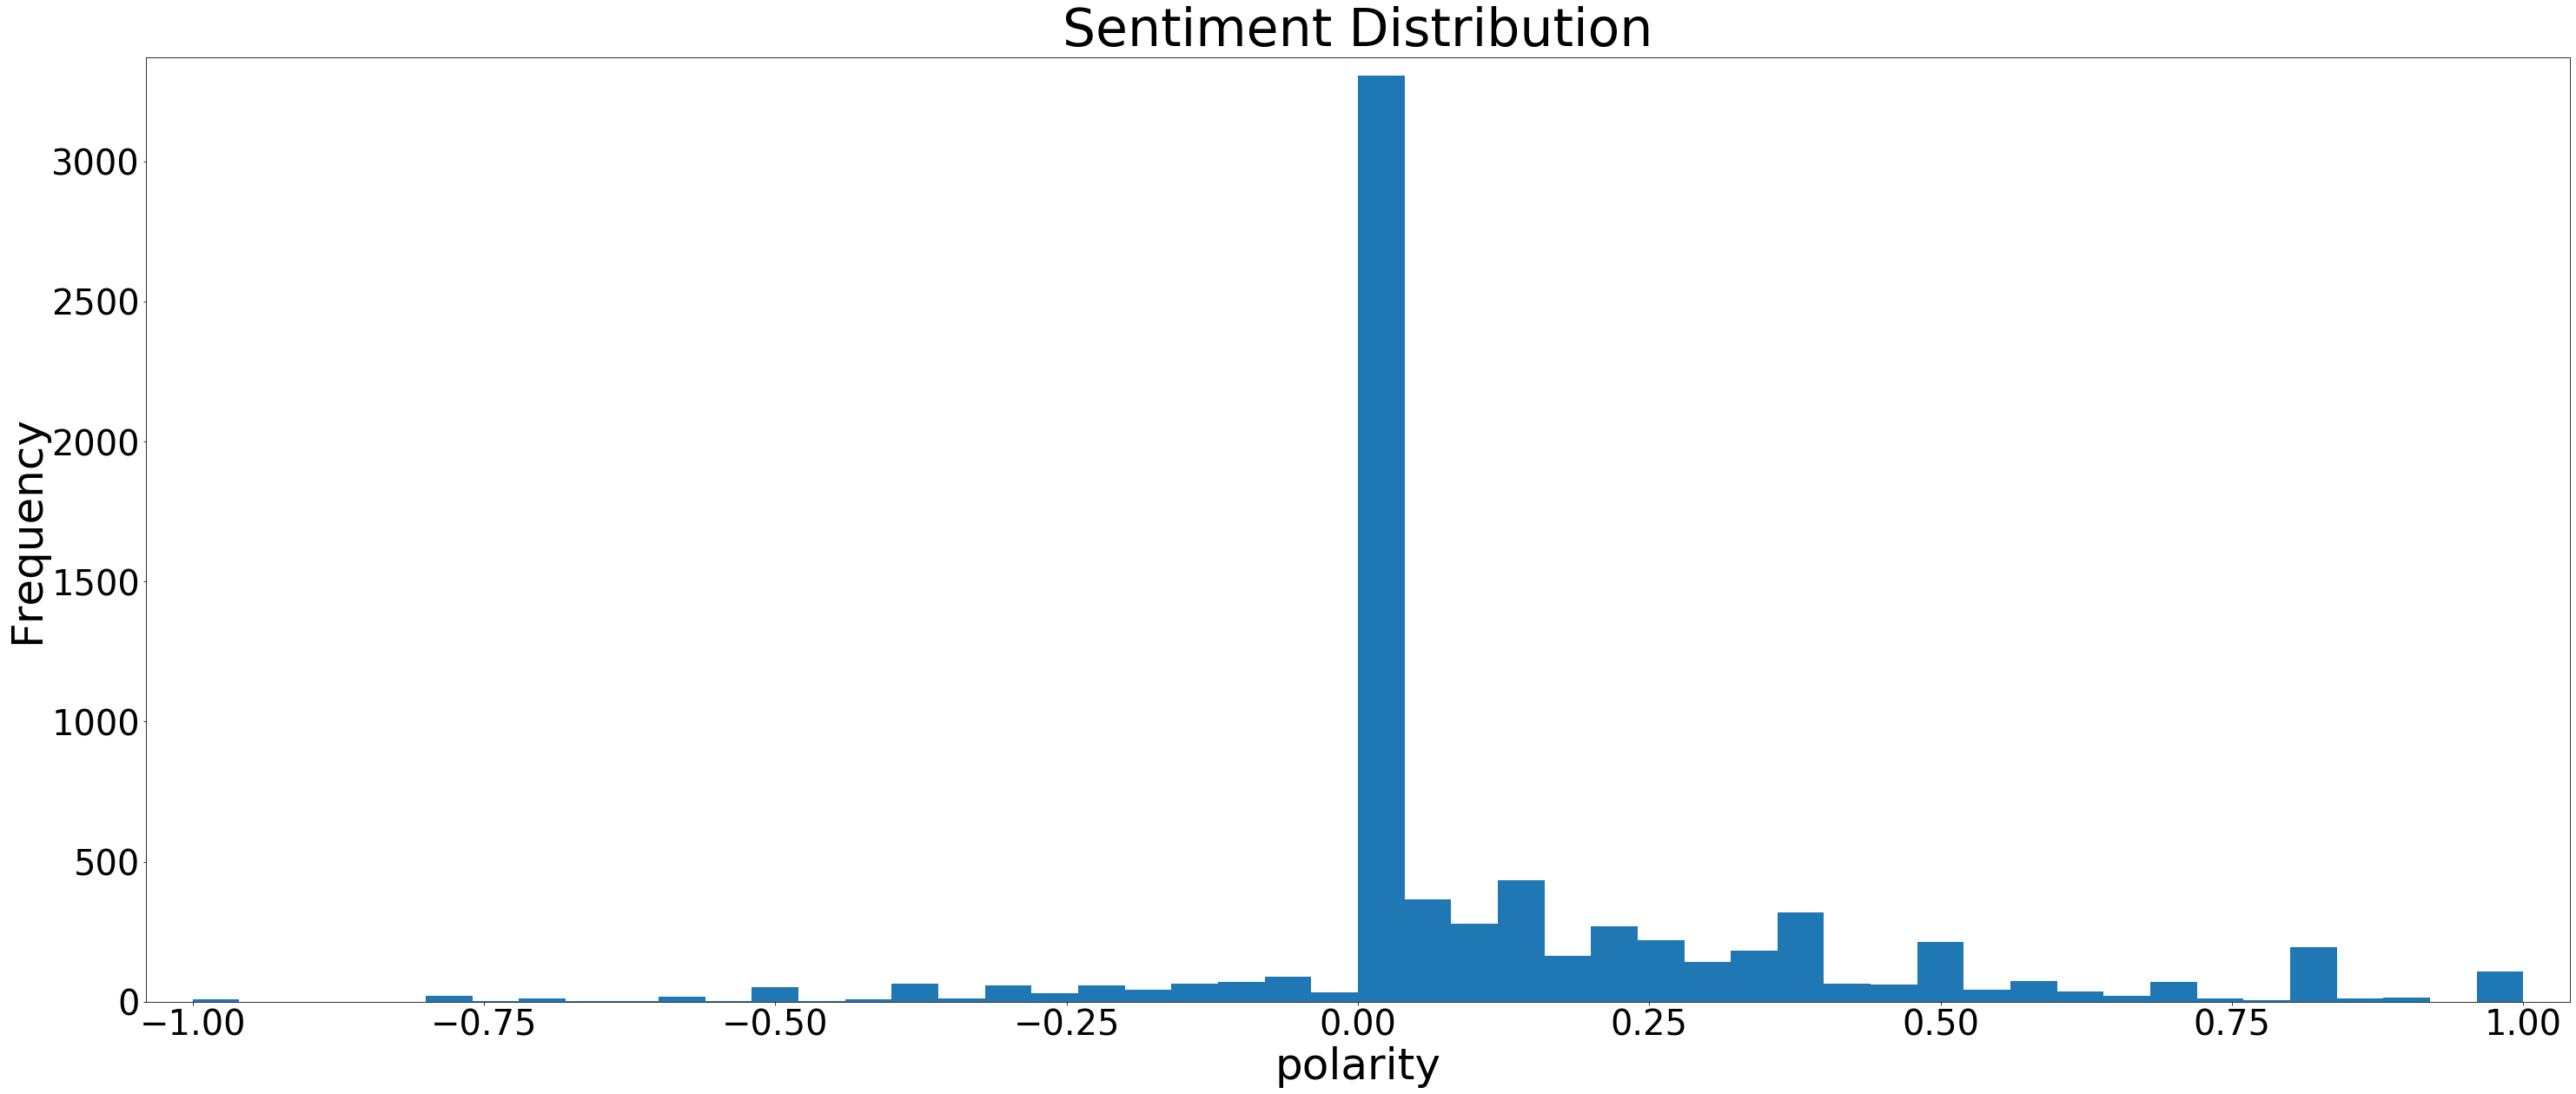

In [45]:
plt.figure(figsize=(50,20))
plt.margins(0.02)
plt.xlabel('polarity', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(data['polarity'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [46]:
data["nb_chars"] = data["lemma_str"].apply(lambda x: len(x))

data["nb_words"] = data["lemma_str"].apply(lambda x: len(x.split(" ")))


In [47]:
data

,lemma_str,lemmatized,sentiment,polarity,lemma_str_tok,nb_chars,nb_words
0,apple define language touch different dialect ...,"[apple, define, language, touch, different, di...",1,-0.125000,apple define language touch with different dia...,58,8
1,learn google doodle doodle light funny amp inn...,"[learn, google, doodle, doodle, light, funny, ...",1,0.381250,learn google doodle all doodle should light fu...,97,12
2,one inyourface steal show yrs quotat apple sch...,"[one, inyourface, steal, show, yrs, quotat, ap...",2,0.000000,one the most inyourface steal the show yrs quo...,70,11
3,iphone app would pretty awesome crash every mi...,"[iphone, app, would, pretty, awesome, crash, e...",0,0.625000,this iphone app would pretty awesome didn t cr...,82,12
4,line outside apple store austin wait new ipad ...,"[line, outside, apple, store, austin, wait, ne...",1,0.068182,line outside the apple store austin wait for t...,50,9
...,...,...,...,...,...,...,...
7269,google plze tammi middle craziness everything ...,"[google, plze, tammi, middle, craziness, every...",1,0.050000,google plze tammi i m middle craziness and eve...,58,8
7270,set link edchat musedchat newtwitter,"[set, link, edchat, musedchat, newtwitter]",1,0.000000,be you all set link edchat musedchat newtwitter,36,5
7271,aha find proof lactation room excuse quotmothe...,"[aha, find, proof, lactation, room, excuse, qu...",1,-0.025000,aha find proof lactation room excuse quotmothe...,84,13
7272,launch ipad app get detail first edition free ...,"[launch, ipad, app, get, detail, first, editio...",1,0.325000,just launch our ipad app get all the detail th...,50,9


In [48]:
data.lemma_str[1]

'learn google doodle doodle light funny amp innovative exception significant occasion googledoodle'

# Highest positive reviews (with more than 5 words)

In [49]:

data[data["nb_words"] >= 5].sort_values("polarity",ascending = False)[["lemma_str", "polarity"]].head(10)

,lemma_str,polarity
2023,apple put pop store folk awesome marketing lin...,1.0
2281,app mxm make awesome link link,1.0
4001,south southwest panel illustrate pic sometimes...,1.0
3525,best thing heard weekend quoti give ipad money...,1.0
3204,holla google party best ever get butt,1.0
2710,airline mention guy kawasaki delightful like a...,1.0
4312,forward delicious tmobile austin iphone user s...,1.0
4313,awesome meet stand apple queue yesterday day,1.0
5016,check holler gram ipad app link ti cover aweso...,1.0
1362,tweet best thing heard weekend quoti give ipad...,1.0


# Plot of avg no of letters per sentiments

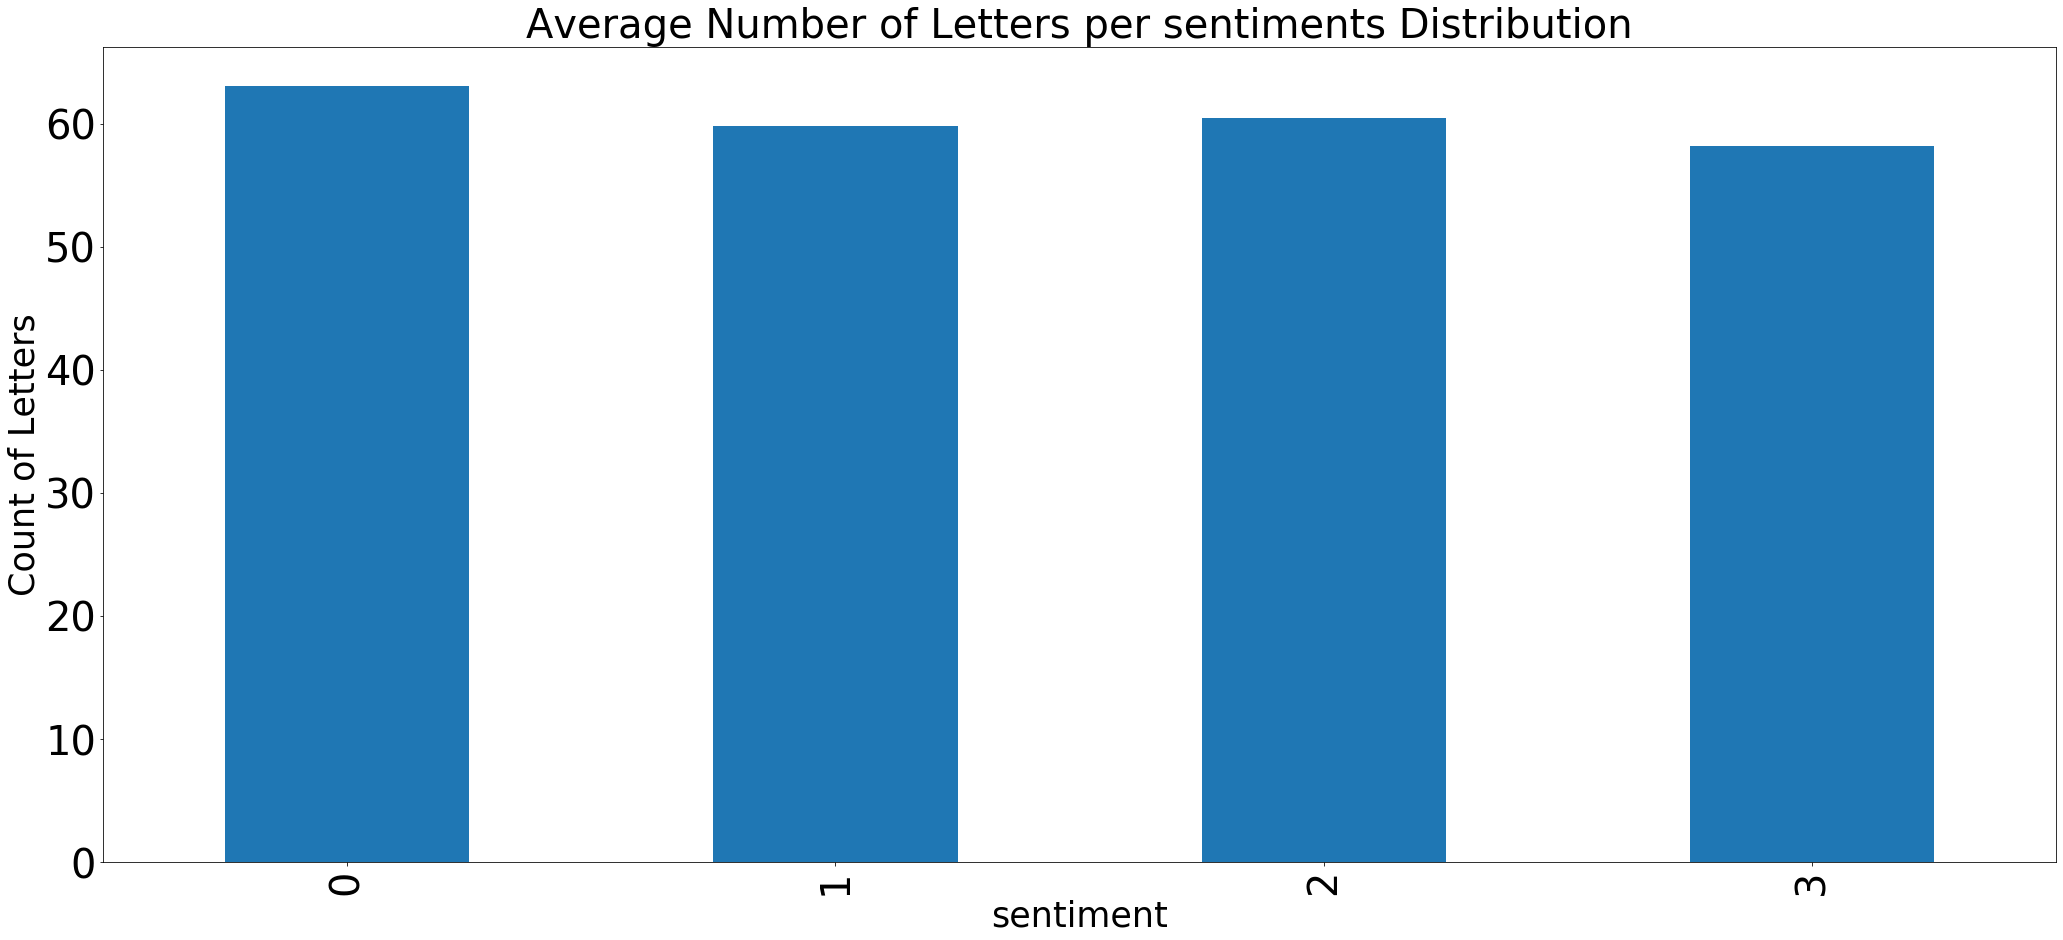

In [50]:
letter_avg = data.groupby('sentiment')['nb_chars'].mean().plot(kind='bar', figsize=(35,15))
plt.xlabel('sentiment', fontsize=35)
plt.ylabel('Count of Letters', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per sentiments Distribution', fontsize=40)
plt.show()

# Plot of avg no of words per sentiments

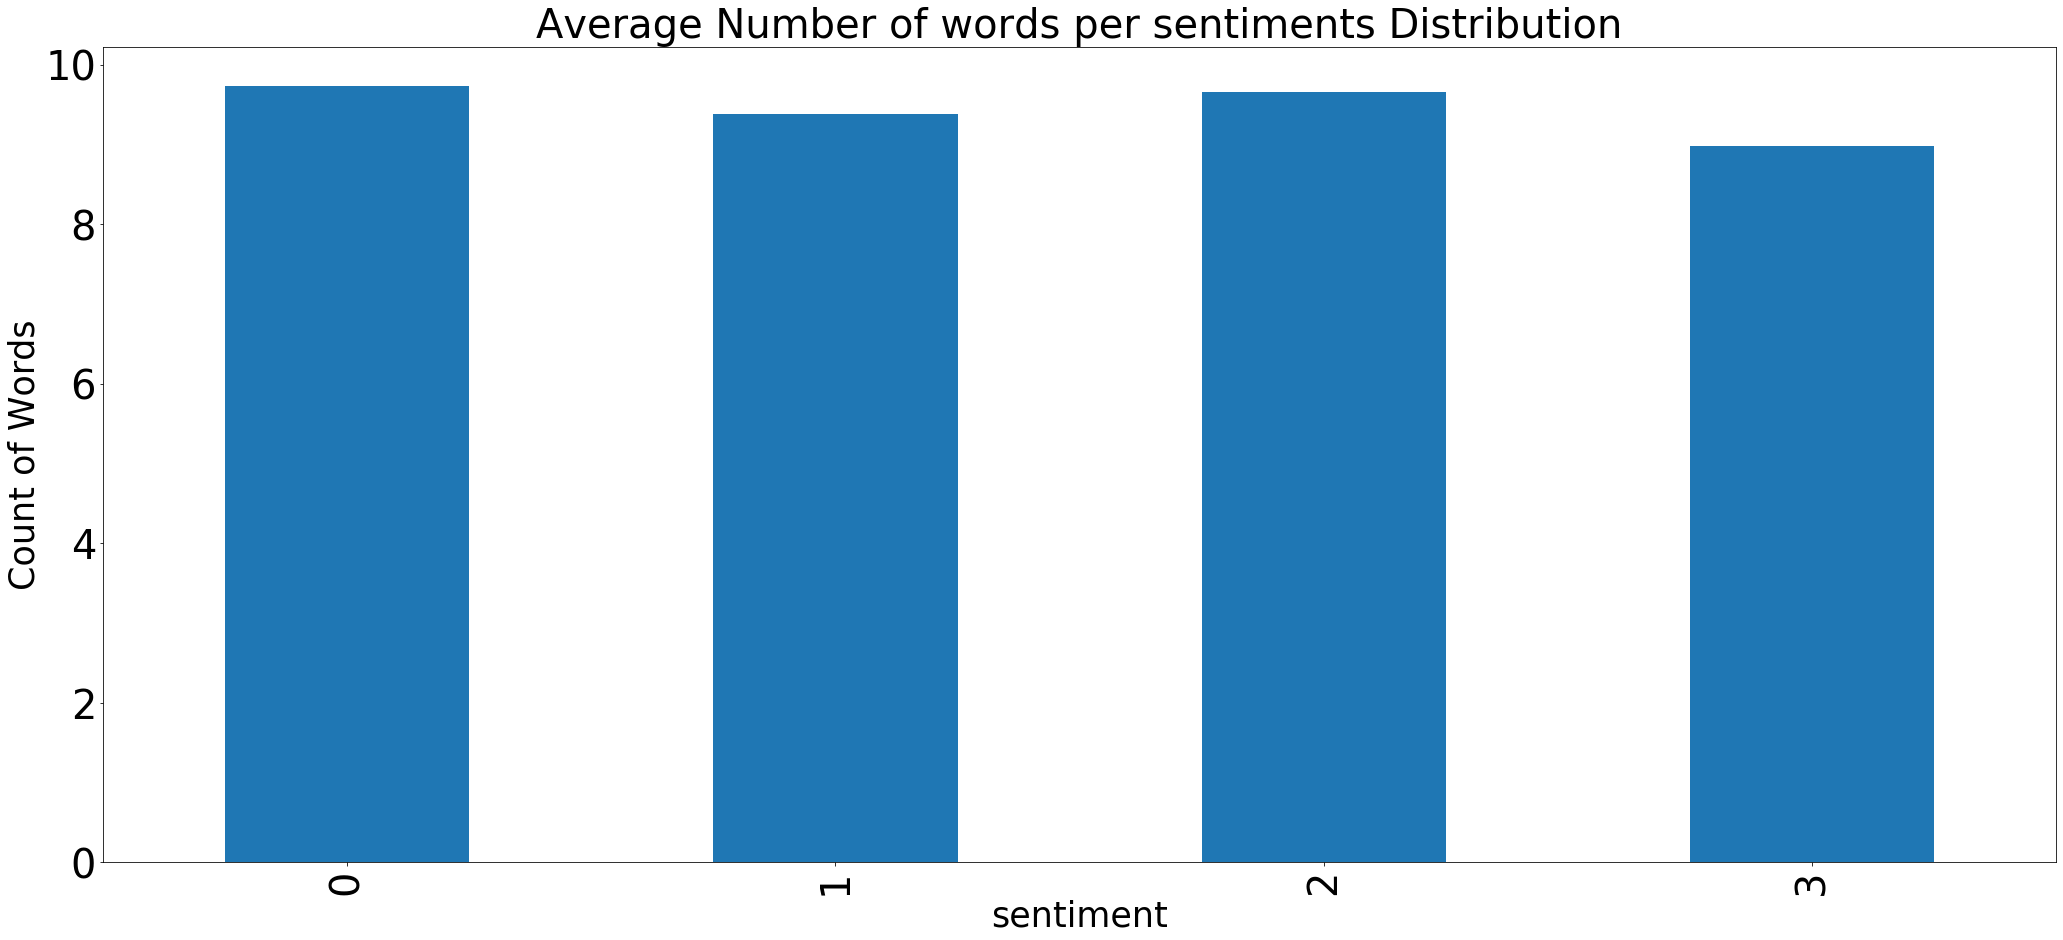

In [51]:
letter_avg = data.groupby('sentiment')['nb_words'].mean().plot(kind='bar', figsize=(35,15))
plt.xlabel('sentiment', fontsize=35)
plt.ylabel('Count of Words', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of words per sentiments Distribution', fontsize=40)
plt.show()

### CHECK correlation of setiments,no. of char and no. of words


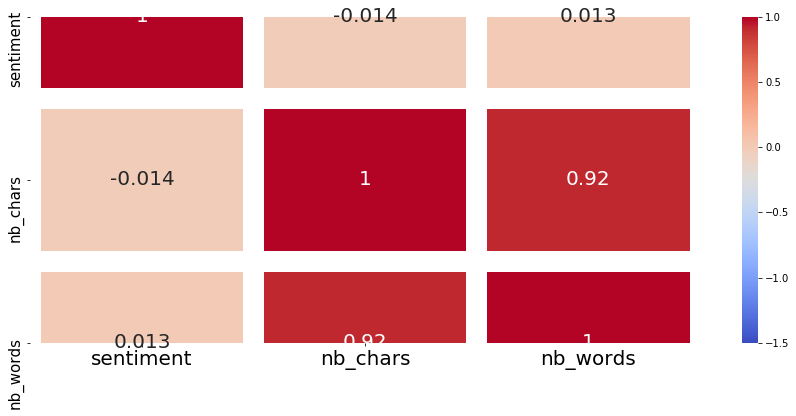

In [52]:
correlation = data[['sentiment', 'nb_chars','nb_words']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,6))
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 20}, linewidths=20, vmin=-1.5, mask=mask)
plt.show()

## Pie plot of sentiments

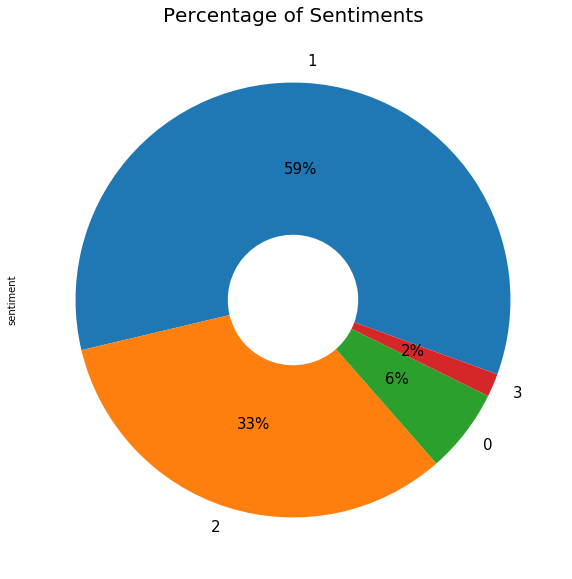

In [53]:


plt.figure(figsize=(30,10))
plt.title('Percentage of Sentiments', fontsize=20)
train.sentiment.value_counts().plot(kind='pie',
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})


## ML removing stop word

In [54]:
# Sentiment Analysis imports

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC


In [55]:
# Create X and Y

X = data['lemma_str']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)


In [56]:
cv = CountVectorizer()
# Creating count vectorizer from training data
X_train_vec = cv.fit_transform(X_train)


In [57]:

# Instantiate all the models

rf = RandomForestClassifier()
lr = LogisticRegression()
gb = GradientBoostingClassifier()
sv = SVC(kernel="linear")



In [58]:
# Convert my test data into vectors for prediction

X_test_vec = cv.transform(X_test)


In [59]:
# Train the models and check CLF report

for model, name in zip([rf, lr, gb, sv], ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'SVM']):
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(f'CLF report for {name}')
    print(classification_report(y_test, y_pred))

CLF report for Random Forest
              precision    recall  f1-score   support

           0       0.61      0.24      0.34        85
           1       0.69      0.86      0.77       882
           2       0.62      0.42      0.50       465
           3       0.00      0.00      0.00        23

    accuracy                           0.67      1455
   macro avg       0.48      0.38      0.40      1455
weighted avg       0.65      0.67      0.65      1455



C:\Users\Azhar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CLF report for Logistic Regression
              precision    recall  f1-score   support

           0       0.34      0.15      0.21        85
           1       0.71      0.80      0.75       882
           2       0.55      0.50      0.53       465
           3       0.00      0.00      0.00        23

    accuracy                           0.65      1455
   macro avg       0.40      0.36      0.37      1455
weighted avg       0.63      0.65      0.64      1455

CLF report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.60      0.11      0.18        85
           1       0.67      0.91      0.77       882
           2       0.64      0.32      0.42       465
           3       0.00      0.00      0.00        23

    accuracy                           0.66      1455
   macro avg       0.48      0.33      0.34      1455
weighted avg       0.64      0.66      0.61      1455

CLF report for SVM
              precision    recall  f1-score

# Using Tfidf vectorization

In [60]:
tf = TfidfVectorizer()
X_train_vec_tf = tf.fit_transform(X_train)
X_test_vec_tf = tf.transform(X_test)



In [61]:
# Train the models and check CLF report for TFIDF vectorizer

for model, name in zip([rf, lr, gb, sv], ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'SVM']):
    model.fit(X_train_vec_tf, y_train)
    y_pred = model.predict(X_test_vec_tf)
    print(f'CLF report for {name}')
    print(classification_report(y_test, y_pred))

CLF report for Random Forest
              precision    recall  f1-score   support

           0       0.57      0.20      0.30        85
           1       0.70      0.85      0.77       882
           2       0.60      0.45      0.52       465
           3       0.00      0.00      0.00        23

    accuracy                           0.67      1455
   macro avg       0.47      0.37      0.39      1455
weighted avg       0.65      0.67      0.65      1455

CLF report for Logistic Regression
              precision    recall  f1-score   support

           0       0.60      0.04      0.07        85
           1       0.69      0.84      0.76       882
           2       0.55      0.45      0.50       465
           3       0.00      0.00      0.00        23

    accuracy                           0.66      1455
   macro avg       0.46      0.33      0.33      1455
weighted avg       0.63      0.66      0.62      1455



C:\Users\Azhar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CLF report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.53      0.09      0.16        85
           1       0.67      0.90      0.77       882
           2       0.63      0.31      0.42       465
           3       0.07      0.04      0.05        23

    accuracy                           0.65      1455
   macro avg       0.48      0.34      0.35      1455
weighted avg       0.64      0.65      0.61      1455

CLF report for SVM
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        85
           1       0.70      0.85      0.77       882
           2       0.58      0.46      0.51       465
           3       0.00      0.00      0.00        23

    accuracy                           0.67      1455
   macro avg       0.45      0.35      0.36      1455
weighted avg       0.64      0.67      0.64      1455



C:\Users\Azhar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ML including stopword

In [62]:
Xr = data['lemma_str_tok']
yr = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, train_size=0.8, random_state=10)

In [63]:
cv = CountVectorizer()
# Creating count vectorizer from training data
X_train_vec = cv.fit_transform(X_train)


In [64]:
# Instantiate all the models

rf = RandomForestClassifier()
lr = LogisticRegression()
gb = GradientBoostingClassifier()
nb = GaussianNB()

In [65]:
# Convert my test data into vectors for prediction

X_test_vec = cv.transform(X_test)


In [66]:
# Train the models and check CLF report

for model, name in zip([rf, lr, gb, sv], ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'SVM']):
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(f'CLF report for {name}')
    print(classification_report(y_test, y_pred))

CLF report for Random Forest
              precision    recall  f1-score   support

           0       0.61      0.20      0.30        85
           1       0.69      0.86      0.76       882
           2       0.61      0.41      0.49       465
           3       0.00      0.00      0.00        23

    accuracy                           0.66      1455
   macro avg       0.47      0.37      0.39      1455
weighted avg       0.64      0.66      0.64      1455



C:\Users\Azhar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CLF report for Logistic Regression
              precision    recall  f1-score   support

           0       0.36      0.18      0.24        85
           1       0.72      0.80      0.76       882
           2       0.57      0.53      0.55       465
           3       0.00      0.00      0.00        23

    accuracy                           0.66      1455
   macro avg       0.41      0.38      0.39      1455
weighted avg       0.64      0.66      0.65      1455

CLF report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.54      0.08      0.14        85
           1       0.67      0.92      0.77       882
           2       0.65      0.31      0.42       465
           3       0.00      0.00      0.00        23

    accuracy                           0.66      1455
   macro avg       0.46      0.33      0.33      1455
weighted avg       0.64      0.66      0.61      1455

CLF report for SVM
              precision    recall  f1-score

In [67]:
tf = TfidfVectorizer()
X_train_vec_tf = tf.fit_transform(X_train)
X_test_vec_tf = tf.transform(X_test)



In [68]:
# Train the models and check CLF report for TFIDF vectorizer

for model, name in zip([rf, lr, gb, sv], ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'SVM']):
    model.fit(X_train_vec_tf, y_train)
    y_pred = model.predict(X_test_vec_tf)
    print(f'CLF report for {name}')
    print(classification_report(y_test, y_pred))

CLF report for Random Forest
              precision    recall  f1-score   support

           0       0.62      0.19      0.29        85
           1       0.69      0.86      0.76       882
           2       0.61      0.41      0.49       465
           3       0.00      0.00      0.00        23

    accuracy                           0.67      1455
   macro avg       0.48      0.37      0.39      1455
weighted avg       0.65      0.67      0.64      1455



C:\Users\Azhar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Azhar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CLF report for Logistic Regression
              precision    recall  f1-score   support

           0       0.75      0.04      0.07        85
           1       0.70      0.84      0.76       882
           2       0.56      0.47      0.51       465
           3       0.00      0.00      0.00        23

    accuracy                           0.66      1455
   macro avg       0.50      0.34      0.34      1455
weighted avg       0.65      0.66      0.63      1455

CLF report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.50      0.12      0.19        85
           1       0.67      0.91      0.77       882
           2       0.64      0.31      0.42       465
           3       0.00      0.00      0.00        23

    accuracy                           0.66      1455
   macro avg       0.45      0.33      0.35      1455
weighted avg       0.64      0.66      0.61      1455

CLF report for SVM
              precision    recall  f1-score

C:\Users\Azhar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


so we are  getting good result bt removing stop words and applying cv

# Pre proccessing on test data

In [69]:
test['clean_tweet']=test['tweet'].map(clean_data)    

In [70]:
test['clean_tweet_str'] = [' '.join(map(str, l)) for l in test['clean_tweet']]
test.head()

,tweet_id,tweet,clean_tweet,clean_tweet_str
0,7506,Audience Q: What prototyping tools do you use?...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link #ci...
2,247,@mention and here's a pic of you winning your...,"[@mention, and, here's, pic, you, winning, you...",@mention and here's pic you winning your ipad ...
3,7688,Google Marissa Mayer: mobile phone as a cursor...,"[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...
4,3294,#SXSW Google maps is even cooler than I thought,"[#sxsw, google, maps, even, cooler, than, thou...",#sxsw google maps even cooler than thought


In [71]:
test['remove_hashtags']=test['clean_tweet_str'].map(clean_hashtag)
test.head(11)

,tweet_id,tweet,clean_tweet,clean_tweet_str,remove_hashtags
0,7506,Audience Q: What prototyping tools do you use?...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,audience what prototyping tools you use sketch...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link #ci...,sxsw send your best photos amp videos link cit...
2,247,@mention and here's a pic of you winning your...,"[@mention, and, here's, pic, you, winning, you...",@mention and here's pic you winning your ipad ...,and here's pic you winning your ipad unsix ...
3,7688,Google Marissa Mayer: mobile phone as a cursor...,"[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...,google marissa mayer mobile phone cursor physi...
4,3294,#SXSW Google maps is even cooler than I thought,"[#sxsw, google, maps, even, cooler, than, thou...",#sxsw google maps even cooler than thought,google maps even cooler than thought
5,6125,RT @mention In front of @mention popup store a...,"[@mention, front, @mention, popup, store, #sxs...",@mention front @mention popup store #sxsw last...,front popup store last night link
6,6131,RT @mention In my next life I'm coming back as...,"[@mention, next, life, i'm, coming, back, ipad...",@mention next life i'm coming back ipad women ...,next life i'm coming back ipad women can't ke...
7,4134,Google celebrating Pi Day in style at #SXSW - ...,"[google, celebrating, day, style, #sxsw, link]",google celebrating day style #sxsw link,google celebrating day style link
8,8206,Hmmm is it a bit weird that #sxsw is not tendi...,"[hmmm, bit, weird, that, #sxsw, not, tending, ...",hmmm bit weird that #sxsw not tending but goog...,hmmm bit weird that not tending but google ci...
9,8552,@mention to launch 'Circles' later today at #S...,"[@mention, launch, 'circles', later, today, #s...",@mention launch 'circles' later today #sxsw go...,launch 'circles' later today gotta love one...


In [72]:
test

,tweet_id,tweet,clean_tweet,clean_tweet_str,remove_hashtags
0,7506,Audience Q: What prototyping tools do you use?...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,audience what prototyping tools you use sketch...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link #ci...,sxsw send your best photos amp videos link cit...
2,247,@mention and here's a pic of you winning your...,"[@mention, and, here's, pic, you, winning, you...",@mention and here's pic you winning your ipad ...,and here's pic you winning your ipad unsix ...
3,7688,Google Marissa Mayer: mobile phone as a cursor...,"[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...,google marissa mayer mobile phone cursor physi...
4,3294,#SXSW Google maps is even cooler than I thought,"[#sxsw, google, maps, even, cooler, than, thou...",#sxsw google maps even cooler than thought,google maps even cooler than thought
...,...,...,...,...,...
1814,1550,@mention @mention @mention Hmmm....how fast ca...,"[@mention, @mention, @mention, hmmmhow, fast, ...",@mention @mention @mention hmmmhow fast can #a...,hmmmhow fast can apple build new store time...
1815,1933,Samsung Galaxy S II Appears At FCC And Team An...,"[samsung, galaxy, appears, fcc, and, team, and...",samsung galaxy appears fcc and team android #s...,samsung galaxy appears fcc and team android p...
1816,9052,@mention You could buy a new iPad 2 tmrw at th...,"[@mention, you, could, buy, new, ipad, tmrw, t...",@mention you could buy new ipad tmrw the apple...,you could buy new ipad tmrw the apple popup s...
1817,4219,Wow very long queue of people at apple pop up ...,"[wow, very, long, queue, people, apple, pop, s...",wow very long queue people apple pop store now...,wow very long queue people apple pop store now...


In [73]:
def only_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text,flags=re.I)
    text=[x for x in text.split() if len(x)>2]
    return text

test['remove_unwanted']=test['remove_hashtags'].map(lambda x: only_text(x))

In [74]:
test['remove_unwanted_str'] = [' '.join(map(str, l)) for l in test['remove_unwanted']]
test.head(2)

,tweet_id,tweet,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,remove_unwanted_str
0,7506,Audience Q: What prototyping tools do you use?...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link #ci...,sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link cit...


In [75]:
test['no_contract'] = test['remove_unwanted'].apply(lambda x: lookup_dict(x,apostrophe_dict))
test.head(10)

,tweet_id,tweet,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,remove_unwanted_str,no_contract
0,7506,Audience Q: What prototyping tools do you use?...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,..."
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link #ci...,sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ..."
2,247,@mention and here's a pic of you winning your...,"[@mention, and, here's, pic, you, winning, you...",@mention and here's pic you winning your ipad ...,and here's pic you winning your ipad unsix ...,"[and, here, pic, you, winning, your, ipad, uns...",and here pic you winning your ipad unsix link ...,"[and, here, pic, you, winning, your, ipad, uns..."
3,7688,Google Marissa Mayer: mobile phone as a cursor...,"[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...,google marissa mayer mobile phone cursor physi...,"[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...,"[google, marissa, mayer, mobile, phone, cursor..."
4,3294,#SXSW Google maps is even cooler than I thought,"[#sxsw, google, maps, even, cooler, than, thou...",#sxsw google maps even cooler than thought,google maps even cooler than thought,"[google, maps, even, cooler, than, thought]",google maps even cooler than thought,"[google, maps, even, cooler, than, thought]"
5,6125,RT @mention In front of @mention popup store a...,"[@mention, front, @mention, popup, store, #sxs...",@mention front @mention popup store #sxsw last...,front popup store last night link,"[front, popup, store, last, night, link]",front popup store last night link,"[front, popup, store, last, night, link]"
6,6131,RT @mention In my next life I'm coming back as...,"[@mention, next, life, i'm, coming, back, ipad...",@mention next life i'm coming back ipad women ...,next life i'm coming back ipad women can't ke...,"[next, life, coming, back, ipad, women, can, k...",next life coming back ipad women can keep thei...,"[next, life, coming, back, ipad, women, can, k..."
7,4134,Google celebrating Pi Day in style at #SXSW - ...,"[google, celebrating, day, style, #sxsw, link]",google celebrating day style #sxsw link,google celebrating day style link,"[google, celebrating, day, style, link]",google celebrating day style link,"[google, celebrating, day, style, link]"
8,8206,Hmmm is it a bit weird that #sxsw is not tendi...,"[hmmm, bit, weird, that, #sxsw, not, tending, ...",hmmm bit weird that #sxsw not tending but goog...,hmmm bit weird that not tending but google ci...,"[hmmm, bit, weird, that, not, tending, but, go...",hmmm bit weird that not tending but google circle,"[hmmm, bit, weird, that, not, tending, but, go..."
9,8552,@mention to launch 'Circles' later today at #S...,"[@mention, launch, 'circles', later, today, #s...",@mention launch 'circles' later today #sxsw go...,launch 'circles' later today gotta love one...,"[launch, circles, later, today, gotta, love, o...",launch circles later today gotta love one plat...,"[launch, circles, later, today, gotta, love, o..."


In [76]:
test['no_conct_str'] = [' '.join(map(str, l)) for l in test['no_contract']]
test.head(2)

,tweet_id,tweet,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,remove_unwanted_str,no_contract,no_conct_str
0,7506,Audience Q: What prototyping tools do you use?...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link #ci...,sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link cit...


In [77]:
test['tokenized'] = test['no_conct_str'].apply(word_tokenize)
test.head(2)

,tweet_id,tweet,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,remove_unwanted_str,no_contract,no_conct_str,tokenized
0,7506,Audience Q: What prototyping tools do you use?...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,..."
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link #ci...,sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ..."


In [78]:
stop_words = set(stopwords.words('english'))
test['stopwords_removed'] = test['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
test.head(2)

,tweet_id,tweet,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,remove_unwanted_str,no_contract,no_conct_str,tokenized,stopwords_removed
0,7506,Audience Q: What prototyping tools do you use?...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...","[audience, prototyping, tools, use, sketchbook..."
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link #ci...,sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...","[sxsw, send, best, photos, amp, videos, link, ..."


In [79]:
test['pos_tags'] = test['stopwords_removed'].apply(nltk.tag.pos_tag)
train.head()

test['wordnet_pos'] = test['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
train.head()

wnl = WordNetLemmatizer()
test['lemmatized'] = test['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
train.head()

test['lemma_str'] = [' '.join(map(str,l)) for l in test['lemmatized']]
test.head()

,tweet_id,tweet,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,remove_unwanted_str,no_contract,no_conct_str,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,7506,Audience Q: What prototyping tools do you use?...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...","[audience, prototyping, tools, use, sketchbook...","[(audience, NN), (prototyping, NN), (tools, NN...","[(audience, n), (prototyping, n), (tools, n), ...","[audience, prototyping, tool, use, sketchbooks...",audience prototyping tool use sketchbookssharp...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link #ci...,sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...","[sxsw, send, best, photos, amp, videos, link, ...","[(sxsw, JJ), (send, NN), (best, JJS), (photos,...","[(sxsw, a), (send, n), (best, a), (photos, n),...","[sxsw, send, best, photo, amp, video, link, ci...",sxsw send best photo amp video link citizenjou...
2,247,@mention and here's a pic of you winning your...,"[@mention, and, here's, pic, you, winning, you...",@mention and here's pic you winning your ipad ...,and here's pic you winning your ipad unsix ...,"[and, here, pic, you, winning, your, ipad, uns...",and here pic you winning your ipad unsix link ...,"[and, here, pic, you, winning, your, ipad, uns...",and here pic you winning your ipad unsix link ...,"[and, here, pic, you, winning, your, ipad, uns...","[pic, winning, ipad, unsix, link, cont, link]","[(pic, NN), (winning, VBG), (ipad, JJ), (unsix...","[(pic, n), (winning, v), (ipad, a), (unsix, a)...","[pic, win, ipad, unsix, link, cont, link]",pic win ipad unsix link cont link
3,7688,Google Marissa Mayer: mobile phone as a cursor...,"[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...,google marissa mayer mobile phone cursor physi...,"[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...,"[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...,"[google, marissa, mayer, mobile, phone, cursor...","[google, marissa, mayer, mobile, phone, cursor...","[(google, NN), (marissa, NN), (mayer, NN), (mo...","[(google, n), (marissa, n), (mayer, n), (mobil...","[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...
4,3294,#SXSW Google maps is even cooler than I thought,"[#sxsw, google, maps, even, cooler, than, thou...",#sxsw google maps even cooler than thought,google maps even cooler than thought,"[google, maps, even, cooler, than, thought]",google maps even cooler than thought,"[google, maps, even, cooler, than, thought]",google maps even cooler than thought,"[google, maps, even, cooler, than, thought]","[google, maps, even, cooler, thought]","[(google, NN), (maps, NNS), (even, RB), (coole...","[(google, n), (maps, n), (even, r), (cooler, v...","[google, map, even, cooler, thought]",google map even cooler thought


In [80]:
test['pos_tok'] = test['tokenized'].apply(nltk.tag.pos_tag)
test.head()

test['wordnet_tok'] = test['pos_tok'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
test.head()

wnl = WordNetLemmatizer()
test['lemmatized_tok'] = test['wordnet_tok'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
test.head()

test['lemma_str_tok'] = [' '.join(map(str,l)) for l in test['lemmatized_tok']]
test.head(1)

,tweet_id,tweet,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,remove_unwanted_str,no_contract,no_conct_str,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,pos_tok,wordnet_tok,lemmatized_tok,lemma_str_tok
0,7506,Audience Q: What prototyping tools do you use?...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...","[audience, prototyping, tools, use, sketchbook...","[(audience, NN), (prototyping, NN), (tools, NN...","[(audience, n), (prototyping, n), (tools, n), ...","[audience, prototyping, tool, use, sketchbooks...",audience prototyping tool use sketchbookssharp...,"[(audience, NN), (what, WP), (prototyping, NN)...","[(audience, n), (what, n), (prototyping, n), (...","[audience, what, prototyping, tool, you, use, ...",audience what prototyping tool you use sketchb...


so finally we are only intrested in clean data column i.e lemma_str

In [81]:
data_test=test['lemma_str']

In [82]:
test

,tweet_id,tweet,clean_tweet,clean_tweet_str,remove_hashtags,remove_unwanted,remove_unwanted_str,no_contract,no_conct_str,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,pos_tok,wordnet_tok,lemmatized_tok,lemma_str_tok
0,7506,Audience Q: What prototyping tools do you use?...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...",audience what prototyping tools you use sketch...,"[audience, what, prototyping, tools, you, use,...","[audience, prototyping, tools, use, sketchbook...","[(audience, NN), (prototyping, NN), (tools, NN...","[(audience, n), (prototyping, n), (tools, n), ...","[audience, prototyping, tool, use, sketchbooks...",audience prototyping tool use sketchbookssharp...,"[(audience, NN), (what, WP), (prototyping, NN)...","[(audience, n), (what, n), (prototyping, n), (...","[audience, what, prototyping, tool, you, use, ...",audience what prototyping tool you use sketchb...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link #ci...,sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...",sxsw send your best photos amp videos link cit...,"[sxsw, send, your, best, photos, amp, videos, ...","[sxsw, send, best, photos, amp, videos, link, ...","[(sxsw, JJ), (send, NN), (best, JJS), (photos,...","[(sxsw, a), (send, n), (best, a), (photos, n),...","[sxsw, send, best, photo, amp, video, link, ci...",sxsw send best photo amp video link citizenjou...,"[(sxsw, JJ), (send, VB), (your, PRP$), (best, ...","[(sxsw, a), (send, v), (your, n), (best, a), (...","[sxsw, send, your, best, photo, amp, video, li...",sxsw send your best photo amp video link citiz...
2,247,@mention and here's a pic of you winning your...,"[@mention, and, here's, pic, you, winning, you...",@mention and here's pic you winning your ipad ...,and here's pic you winning your ipad unsix ...,"[and, here, pic, you, winning, your, ipad, uns...",and here pic you winning your ipad unsix link ...,"[and, here, pic, you, winning, your, ipad, uns...",and here pic you winning your ipad unsix link ...,"[and, here, pic, you, winning, your, ipad, uns...","[pic, winning, ipad, unsix, link, cont, link]","[(pic, NN), (winning, VBG), (ipad, JJ), (unsix...","[(pic, n), (winning, v), (ipad, a), (unsix, a)...","[pic, win, ipad, unsix, link, cont, link]",pic win ipad unsix link cont link,"[(and, CC), (here, RB), (pic, NN), (you, PRP),...","[(and, n), (here, r), (pic, n), (you, n), (win...","[and, here, pic, you, win, your, ipad, unsix, ...",and here pic you win your ipad unsix link cont...
3,7688,Google Marissa Mayer: mobile phone as a cursor...,"[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...,google marissa mayer mobile phone cursor physi...,"[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...,"[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...,"[google, marissa, mayer, mobile, phone, cursor...","[google, marissa, mayer, mobile, phone, cursor...","[(google, NN), (marissa, NN), (mayer, NN), (mo...","[(google, n), (marissa, n), (mayer, n), (mobil...","[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...,"[(google, NN), (marissa, NN), (mayer, NN), (mo...","[(google, n), (marissa, n), (mayer, n), (mobil...","[google, marissa, mayer, mobile, phone, cursor...",google marissa mayer mobile phone cursor physi...
4,3294,#SXSW Google maps is even cooler than I thought,"[#sxsw, google, maps,

# ML on test dataset

In [83]:
feature = 'lemma_str'
target = 'sentiment'

In [84]:
cv = CountVectorizer()

XX_train_vec_tf = cv.fit_transform(train[feature])
XX_test_vec_tf = cv.transform(test[feature])

In [85]:
clfmodel = LogisticRegression()
clfmodel.fit(XX_train_vec_tf,train[target]) 
predictions = clfmodel.predict(XX_test_vec_tf)

C:\Users\Azhar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Creating submission file

In [86]:
submission = pd.DataFrame({'tweet_id':test['tweet_id'],'sentiment':predictions})
submission
submission['sentiment'].value_counts()

1    1237
2     523
0      59
Name: sentiment, dtype: int64

In [87]:
submission

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,2
4,3294,2
...,...,...
1814,1550,2
1815,1933,1
1816,9052,2
1817,4219,0


In [88]:
submission.to_csv('submission.csv', index=False)